**LOADING THE DATASET**

In [12]:
import pandas as pd

# Load your combined dataset
df = pd.read_csv("fake_news_combined.csv")

# Quick look
df.head()

,content,label
0,experts recommend everyone avoid large gatheri...,1
1,experts say the key is to stay in the know and...,1
2,some people have reportedly been presenting fa...,1
3,medical experts say they believe bidens plan t...,1
4,scientists around the world are working on a n...,1


**PRE PROCESSING THE TEXT**

In [13]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # remove links
    text = re.sub(r'\W', ' ', text)  # remove special characters
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['clean_content'] = df['content'].apply(clean_text)

**SPLITTING THE DATA AND VECTORIZING IT**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['clean_content']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
# ✅ Logistic Regression with balanced class weights
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_vec, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test_vec)

print("🔍 Classification Report:\n")
print(classification_report(y_test, y_pred))

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Save the updated model and vectorizer
joblib.dump(model, "fake_news_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

print("✅ Updated model and vectorizer saved!")

🔍 Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.91      0.88        46
           1       0.98      0.97      0.98       233

    accuracy                           0.96       279
   macro avg       0.92      0.94      0.93       279
weighted avg       0.96      0.96      0.96       279

📊 Confusion Matrix:
[[ 42   4]
 [  7 226]]
✅ Updated model and vectorizer saved!


**SAVING THE UPDATED MODEL AND VECTORIZER**

In [25]:
joblib.dump(model, "fake_news_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

print("✅ Updated model and vectorizer saved!")

✅ Updated model and vectorizer saved!


**CONFUSION MATRIX HEATMAP**

In [10]:
import joblib

C:\Users\user\AppData\Local\Temp\ipykernel_18452\3405245615.py:15: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\user\anaconda3\finalanaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


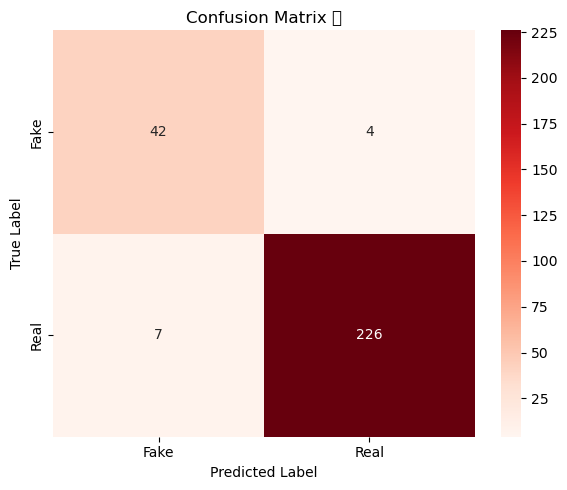

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Actual vs Predicted
cm = confusion_matrix(y_test, y_pred)
labels = ["Fake", "Real"]

# Plotting
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix 📊")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

*Top-left (True Fake) = 42*
*Bottom-right (True Real) = 226*
*Errors (top-right & bottom-left) in a lighter shade*
*Helps highlight how well your model is catching both classes visually*

**CLASS-WISE METRICS BAR CHART**

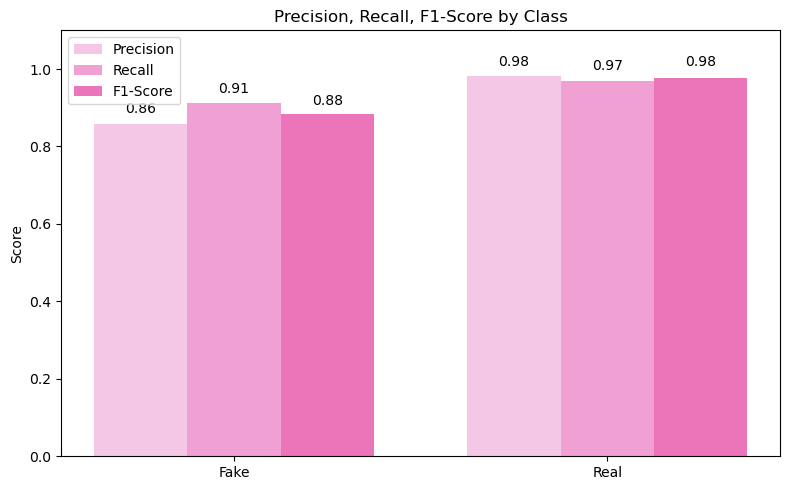

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Generate classification report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Labels
classes = ['Fake', 'Real']
metrics = ['precision', 'recall', 'f1-score']

# Values per metric
values = [[report[str(i)][metric] for metric in metrics] for i in range(2)]

# Plot
x = np.arange(len(classes))  # Label locations
width = 0.25

fig, ax = plt.subplots(figsize=(8, 5))

# Using different shades of pink for each metric
pink_shades = ['#f4c7e7', '#f1a0d3', '#ec75b9']  # Light pink, medium pink, dark pink

for i, metric in enumerate(metrics):
    ax.bar(x + i*width, [v[i] for v in values], width, label=metric.title(), color=pink_shades[i])

# Labels and style
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, F1-Score by Class')
ax.set_xticks(x + width)
ax.set_xticklabels(classes)
ax.set_ylim(0, 1.1)
ax.legend()

# Add values on top of bars
for i in range(len(classes)):
    for j in range(len(metrics)):
        val = round(values[i][j], 2)
        ax.text(i + j*width, val + 0.02, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()

*The bar chart visualization provides a side-by-side comparison of the performance metrics — precision, recall, and F1-score — for both Fake and Real news classes. This chart highlights the model’s exceptional ability to detect Real news, with precision, recall, and F1-score values close to 1 (near-perfect). On the other hand, the detection of Fake news has seen significant improvement, becoming much more reliable compared to the previous results, with a notable increase in recall. These visualized metrics help to clearly communicate the model’s strengths in distinguishing between the two classes.*



**TESTING**

In [30]:
input_text = "Breaking news: Scientists discover new species in the Amazon rainforest!"

# Preprocess and vectorize the input text
cleaned_text = clean_text(input_text)
vectorized_text = vectorizer.transform([cleaned_text])

# Make the prediction
prediction = model.predict(vectorized_text)

# Print the prediction result
if prediction == 0:
    print("❌ Fake News!")
else:
    print("✅ Real News!")

✅ Real News!
